In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from Libs.HandTracker import HandTracker

In [2]:
import pickle
with open('digits_classifier.pkl', 'rb') as f:
    model = pickle.load(f)

In [3]:
def distanceMatrix(handData, palmdist):
#     """Eucledian distances between points 0,4,5,9,13,17,8,12,16 and 20"""
    distMatrix = np.zeros([len(handData), len(handData)], dtype="float32")
    pd = palmdist[0]
    for i in range(len(handData)):
        if i > 20:
            pd = palmdist[1]
        for j in range(len(handData)):
            distMatrix[i][j] = np.linalg.norm(np.array(handData[i]) - np.array(handData[j])) /pd
    return distMatrix

In [13]:
def getData(frame):
    tracker = HandTracker(static= True)
    image = cv2.cvtColor(cv2.imread(frame),cv2.COLOR_BGR2RGB)
    results = tracker.findHands(image)
    positions = []
    palmdist = []
    if results:
        for landmarks in results:
            tracker.drawHands(image, landmarks)
            position = tracker.getPos(landmarks.landmark, image.shape)
            pd = np.linalg.norm(np.array(position[0]) - np.array(position[9]))
            palmdist.append(pd)
            positions.extend(position)
    return distanceMatrix(positions, palmdist)

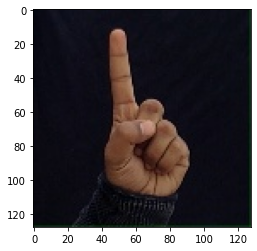

In [7]:
image = cv2.imread()
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [34]:
image_data = getData("Resources/ISL/Digits/7/1.jpg")
image_data = image_data.reshape(21*21)
image_data.shape

(441,)

In [35]:
model.predict([image_data])

array([7], dtype=uint8)